# Weekly Case Trend - Hillsborough FL

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with artical at:

https://www.nytimes.com/article/coronavirus-county-data-us.html


In [2]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

### Add line to bottom of this section for new data
path_covid_data_us_counties_1 = datapath / 'covid-19-data-20200706' / 'us-counties.csv'
path_covid_data_us_counties_2 = datapath / 'covid-19-data-20200720' / 'us-counties.csv'
path_covid_data_us_counties_3 = datapath / 'covid-19-data-20200813' / 'us-counties.csv'
path_covid_data_us_counties_4 = datapath / 'covid-19-data-20200820' / 'us-counties.csv'
path_covid_data_us_counties_5 = datapath / 'covid-19-data-20200827' / 'us-counties.csv'
path_covid_data_us_counties_6 = datapath / 'covid-19-data-20200903' / 'us-counties.csv'
path_covid_data_us_counties_7 = datapath / 'covid-19-data-20200916' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties_7

df_covid_data_us_counties = pd.read_csv(county_data_path)

### Virginia Counties:

- Hillsborough County, FL (12057), pop = 1,436,890
- Pinellas (12103), pop = 975,280
- Pasco (12101), pop = 539,630

total pop = 2,951,800 (2020)

population from https://worldpopulationreview.com/us-counties/states/fl

In [11]:
# make a list of all the counties i'm interested in
list_fips_fl_counties = [12057, 12103, 12101]
pop2020 = 2951800

# list_fips_va_counties = [51047, 51061, 51177, 51179, 51153, 51059, 51107,51013]
# list_fips_va_cities = [51630, 51683, 51600, 51610, 51510]
# list_fips_dc = [11000, 11001]
# list_fips_md = [24017, 24033, 24031, 24027, 24003, 24021]

# list_fips_va = list_fips_va_counties + list_fips_va_cities

# list_fips_metrodc = list_fips_va + list_fips_dc + list_fips_md 

In [13]:
# get the data fpr particular counties in list from above
df_covid_data_hills_fl = df_covid_data_us_counties[df_covid_data_us_counties.fips.isin(list_fips_fl_counties)]

# aggregate the sums of cases and deaths by date
df_covid_data_hills_bydate_diff = df_covid_data_hills_fl.groupby(['date'])[['cases', 'deaths']].agg('sum').diff().reset_index()

# derive a column for the sliding average
df_covid_data_hills_bydate_diff['cases_7day_ave'] = df_covid_data_hills_bydate_diff.cases.rolling(7).mean().shift(-3)

# derive per capita data
df_covid_data_hills_bydate_diff['cases_pc'] = df_covid_data_hills_bydate_diff['cases'] / pop2020 * 100000
df_covid_data_hills_bydate_diff['cases_7d_pc'] = df_covid_data_hills_bydate_diff['cases_7day_ave'] / pop2020 * 100000

# display the most recent 20 days
df_covid_data_hills_bydate_diff.tail(20)

,date,cases,deaths,cases_7day_ave,cases_pc,cases_7d_pc
179,2020-08-27,320.0,10.0,288.428571,10.840843,9.771278
180,2020-08-28,313.0,6.0,292.000000,10.603699,9.892269
181,2020-08-29,323.0,9.0,333.857143,10.942476,11.310290
182,2020-08-30,343.0,3.0,326.142857,11.620028,11.048948
183,2020-08-31,184.0,18.0,320.857143,6.233485,10.869881
184,2020-09-01,506.0,5.0,315.285714,17.142083,10.681134
185,2020-09-02,294.0,8.0,328.285714,9.960024,11.121543
186,2020-09-03,283.0,8.0,319.714286,9.587370,10.831164
187,2020-09-04,274.0,0.0,320.571429,9.282472,10.860202
188,2020-09-05,414.0,3.0,273.714286,14.025340,9.272792


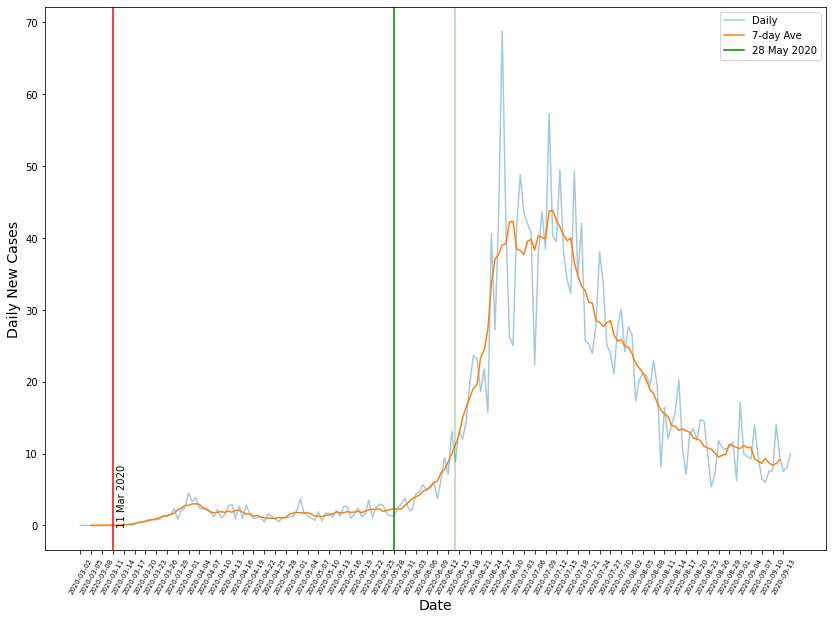

In [14]:
# bigger plot elements suitable for giving talks
#sns.set_context("talk")

# set figure size
fig = plt.figure(figsize=(14,10))

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",
             y="cases_pc",
             label="Daily", 
             data=df_covid_data_hills_bydate_diff,
             ci=None, 
             alpha=.4)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
plot_ = sns.lineplot(x="date",
                     y="cases_7d_pc",
                     label="7-day Ave",
                     data=df_covid_data_hills_bydate_diff)#,
                     #ci=None)
fig.canvas.draw()

plt.axvline('2020-03-11', color='r')
plt.text(10.1,0,'11 Mar 2020',rotation=90)

plt.axvline('2020-05-28', color='green', label="28 May 2020")

plt.axvline('2020-06-14', color='green', alpha=.31)

plt.legend()

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 3), new_ticks[::3], rotation=60, fontweight='light', fontsize='x-small')

# plt.xticks(
#     rotation=90,
#     fontweight='light',
#     fontsize='x-small'
# )

# save image as PNG file
plt.savefig("Time_Series_Plot_with_7day_average_Seaborn.png",
                    format='png',
                    dpi=150)